# <center> Майнор "Интеллектуальный анализ данных" <center>

# <center> Курс "Современные методы машинного обучения" <center>

# <center> Лабораторная работа №1. Supervised learning <center>

## Table of contents  
  
* [Часть 1. Работа с данными](#part1)
* [Часть 2. Методы машинного обучения](#part2)
* [Часть 3. Соревнование по машинному обучению](#part3)

## Часть 1. Работа с данными <a id="part1"></a>

В данной части лабораторной вам предстоит работать с данными по оттоку клиентов одной телекомуникационной компании. Оригинал данных доступен [здесь](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383). Для лабораторной работы данные были модифицированы.

Данные находятся в файле `telecom_churn_mod.csv`

**Описание данных:**

In [143]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg' 

import warnings
warnings.simplefilter('ignore')

In [144]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', -1)

In [145]:
pd.read_csv('telecom_churn_description.csv')

,Признак,Описание,Тип
0,ID,Уникальный идентификатор объекта,Числовой (integer)
1,Sex,Пол,Символьный
2,Age,Возраст,Числовой (integer)
3,State,Буквенный код штата,Символьный
4,Account length,Как долго клиент обслуживается компанией,Числовой (integer)
5,Phone number,Номер телефона клиента,Символьный
6,Plans,Подключенные планы,Символьный (None; International/Voice mail or both)
7,Number vmail messages,Количество голосовых сообщений,Числовой (integer)
8,Total day minutes,Общая длительность разговоров днем,Числовой (float)
9,Total day calls,Общее количество звонков днем,Числовой (float)


### Задание 1  
  
Считайте данные из файла. Оцените размерность данных, есть ли в данных пропущенные значения. Посмотрите на автоматически определенные типы признаков.

In [146]:
data = pd.read_csv('telecom_churn_mod.csv', sep=';')
data.head(5)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,40075,Female,37.0,KS,128,415 424 17 55,Voice mail,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,75.56,1,False
1,17475,Female,NaN,OH,107,415 759 41 43,Voice mail,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,59.24,1,False
2,62242,Female,19.0,NJ,137,415 213 11 40,None,0,243.4,114.0,41.38,121.2,110.0,10.30,l62.6,104.0,7.32,12.2,5.0,3.29,62.29,0,False
3,81231,Female,31.0,OH,84,408 487 53 35,International,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,66.8,2,False
4,78542,Female,30.0,OK,75,415 509 25 27,International,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,52.09,3,False


Размерность

In [147]:
data.shape

(3333, 23)

Посмотрю на автоматически определенные типы признаков.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3333 non-null int64
Sex                       3333 non-null object
Age                       2333 non-null float64
State                     3333 non-null object
Account length            3333 non-null int64
Phone number              3333 non-null object
Plans                     3233 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null object
Total day calls           3333 non-null object
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null float64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null object
Total night calls         3333 non-null float64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null object
Total intl calls          3333 non-null flo

Признак Age имеет 1000 пропущенных значений, а Plans - 100 значений.

### Задание 2  
  
Приведите числовые признаки, которые были распознаны некорректно, к числовому типу данных.  
Найдите и опишите ошибки в данных, которые мешают приведению типов. Сколько признаков содержат ошибки, сколько наблюдений по каждому такому признаку? Исправьте эти ошибки и снова выполните приведение типов.  
**NB:** Исправлять ошибки необходимо программно (используя python), изменять исходный файл "руками" не разрешается. 

Ошибки, содержащиеся в признаках  Customer service calls, Total day minutes, Total day calls, Total night minutes, Total intl minutes, Total charge:

1. В числах были запятые вместо точек, буква O вместо нуля и L вместо единицы. 
2. Слово hundred, а также названия месяцев  вместо его числового значения в признаке Total Charge.

In [149]:
total_intl_minutes_errors = [] 
total_charge_errors = [] 
customer_service_calls_errors = []
total_day_minutes_errors = [] 
total_day_calls_errors = [] 
total_night_minutes_errors = [] 

In [150]:
for i in range(len(data)):        
    try: float (data['Total intl minutes'][i]) 
    except ValueError: total_intl_minutes_errors.append(data['Total intl minutes'][i])
        
    try: float (data['Total charge'][i]) 
    except ValueError: total_charge_errors.append(data['Total charge'][i])
        
    try: int (data['Customer service calls'][i]) 
    except ValueError: customer_service_calls_errors.append(data['Customer service calls'][i])
      
    try: float (data['Total day minutes'][i]) 
    except ValueError: total_day_minutes_errors.append(data['Total day minutes'][i])
        
    try: float (data['Total day calls'][i]) 
    except ValueError: total_day_calls_errors.append(data['Total day calls'][i])
        
    try: float (data['Total night minutes'][i]) 
    except ValueError: total_night_minutes_errors.append(data['Total night minutes'][i])  

In [151]:
print('Количество ошибок:\nTotal intl charge ', len(total_intl_minutes_errors),
     '\nTotal charge ', len(total_charge_errors),
     '\nCustomer service calls', len(customer_service_calls_errors),
     '\nTotal day minutes ', len(total_day_minutes_errors),
     '\nTotal day calls ', len(total_day_calls_errors),
     '\nTotal night minutes ', len(total_night_minutes_errors),)

Количество ошибок:
Total intl charge  32 
Total charge  15 
Customer service calls 6 
Total day minutes  50 
Total day calls  4 
Total night minutes  10


Дабы пофиксить некоторые записи в Total charge, удалю подстроку 'hundread' и умножу полученное число на 100, приведя его к типу float.

In [152]:
for i in range(len(data['Total charge'])):
    try: float(data['Total charge'][i])
    except ValueError:
        data['Total charge'][i] = float(data['Total charge'][i].split(' ')[0]) * 100
        
data['Total charge'] = data['Total charge'].astype('float64')        

Заменю запятые, L и O на . , 0, 1, чтобы поправить данные в других признаках, а также приведу их к типам int, float.

In [153]:
data['Customer service calls'] = data['Customer service calls'].str.replace('o','0').apply(pd.to_numeric)
data['Total day minutes'] = data['Total day minutes'].str.replace(',','.')
data['Total intl minutes'] = data['Total intl minutes'].str.replace(',','.').apply(pd.to_numeric)
data['Total day calls'] = data['Total day calls'].str.replace('o','0').apply(pd.to_numeric)
data['Total night minutes'] = data['Total night minutes'].str.replace('l','1').apply(pd.to_numeric)
data['Total day minutes'] = data['Total day minutes'].str.replace('o','0').apply(pd.to_numeric)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3333 non-null int64
Sex                       3333 non-null object
Age                       2333 non-null float64
State                     3333 non-null object
Account length            3333 non-null int64
Phone number              3333 non-null object
Plans                     3233 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null float64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null float64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null float64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null

### Задание 3  
  
Оцените набор данных на предмет пропущенных значений. Какие признаки содержат пропуски? Сколько наблюдений с пропусками по каждому такому признаку?  
По каждому признаку предложите и обоснуйте, что делать с пропущенными значениями. 

In [155]:
data.isnull().sum()

ID                        0   
Sex                       0   
Age                       1000
State                     0   
Account length            0   
Phone number              0   
Plans                     100 
Number vmail messages     0   
Total day minutes         0   
Total day calls           0   
Total day charge          0   
Total eve minutes         0   
Total eve calls           0   
Total eve charge          0   
Total night minutes       0   
Total night calls         0   
Total night charge        0   
Total intl minutes        0   
Total intl calls          0   
Total intl charge         0   
Total charge              0   
Customer service calls    0   
Churn                     0   
dtype: int64

У Plans пропущено 100 значений, а у Age 1000. Age заполню средним значением в пропусках. В Plans будет None.

In [156]:
data['Plans'] = data['Plans'].fillna('None')
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [157]:
data.isnull().sum()

ID                        0
Sex                       0
Age                       0
State                     0
Account length            0
Phone number              0
Plans                     0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Total charge              0
Customer service calls    0
Churn                     0
dtype: int64

### Задание 4  
  
В признаке `Phone number` первые три цифры номера отвечают за код зоны покрытия сети.  
Создайте новый признак `Area code`, содержайщий код покрытия сети.  
Вычислите, сколько таких зон представлено в данных. Сколько наблюдений по каждой зоне?  
Вычислите, сколько штатов входит в каждую зону. Есть ли штаты, которые находятся сразу в нескольких зонах покрытия? Если есть, приведите примеры.

Создам признак из трех первых цифр признака Phone Number и приведу его к long int.

In [158]:
data['Area code'] = [x[:3] for x in data['Phone number']]
data['Area code'] = data['Area code'].astype('int64')

In [159]:
data.head(5)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code
0,40075,Female,37.000000,KS,128,415 424 17 55,Voice mail,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,75.56,1,False,415
1,17475,Female,34.504501,OH,107,415 759 41 43,Voice mail,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,59.24,1,False,415
2,62242,Female,19.000000,NJ,137,415 213 11 40,None,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,62.29,0,False,415
3,81231,Female,31.000000,OH,84,408 487 53 35,International,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,66.80,2,False,408
4,78542,Female,30.000000,OK,75,415 509 25 27,International,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,52.09,3,False,415


Всего имеестя 3 зоны

In [160]:
data['Area code'].value_counts()

415    1655
510    840 
408    838 
Name: Area code, dtype: int64

По кросс-таблице вижу, что любая зона покрывает все штаты.

In [161]:
pd.crosstab(data['Area code'], data['State'])

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,...,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Area code,,,,,,,,,,,,,,,,,,,,,,,,,
408,14,25,13,15,7,25,22,14,13,12,15,15,...,12,13,16,11,20,12,25,17,23,22,20,17
415,24,40,27,36,17,29,39,27,31,31,21,30,...,35,30,28,30,37,37,35,36,26,35,52,41
510,14,15,15,13,10,12,13,13,17,20,18,8,...,18,17,16,12,15,23,17,20,17,21,34,19


In [162]:
pd.crosstab(data['Area code'], data['State']).isnull().sum()

State
AK    0
AL    0
AR    0
AZ    0
CA    0
CO    0
CT    0
DC    0
DE    0
FL    0
GA    0
HI    0
IA    0
ID    0
IL    0
IN    0
KS    0
KY    0
LA    0
MA    0
MD    0
ME    0
MI    0
MN    0
MO    0
MS    0
MT    0
NC    0
ND    0
NE    0
NH    0
NJ    0
NM    0
NV    0
NY    0
OH    0
OK    0
OR    0
PA    0
RI    0
SC    0
SD    0
TN    0
TX    0
UT    0
VA    0
VT    0
WA    0
WI    0
WV    0
WY    0
dtype: int64

### Задание 5  
  
Вычислите тарифные планы (стоимость минуты разговора): day, eve, night, intl.  
Проверьте, различаются ли они для различных зон покрытия сети. 

Чтобы создать признак со стоимостью 1 минуты разговора, разделю стоимось на минуты для каждого наблюдения.

In [163]:
night_cost = []
intl_cost = []

day_cost = []
eve_cost = []

for i in range (0, data.shape[0]):
    night_cost = data['Total night charge'][i] / data['Total night minutes'][i]
    intl_cost = data['Total intl charge'][i] / data['Total intl minutes'][i]
    day_cost = data['Total day charge'][i] / data['Total day minutes'][i]
    eve_cost = data['Total eve charge'][i] / data['Total eve minutes'][i]
    

data['Night cost'] = night_cost
data['Intl cost'] = intl_cost

data['Day cost'] = day_cost
data['Eve cost']= eve_cost

In [164]:
data.head(5)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code,Night cost,Intl cost,Day cost,Eve cost
0,40075,Female,37.000000,KS,128,415 424 17 55,Voice mail,25,265.1,110.0,45.07,197.4,...,11.01,10.0,3.0,2.70,75.56,1,False,415,0.044988,0.270073,0.170009,0.084994
1,17475,Female,34.504501,OH,107,415 759 41 43,Voice mail,26,161.6,123.0,27.47,195.5,...,11.45,13.7,3.0,3.70,59.24,1,False,415,0.044988,0.270073,0.170009,0.084994
2,62242,Female,19.000000,NJ,137,415 213 11 40,None,0,243.4,114.0,41.38,121.2,...,7.32,12.2,5.0,3.29,62.29,0,False,415,0.044988,0.270073,0.170009,0.084994
3,81231,Female,31.000000,OH,84,408 487 53 35,International,0,299.4,71.0,50.90,61.9,...,8.86,6.6,7.0,1.78,66.80,2,False,408,0.044988,0.270073,0.170009,0.084994
4,78542,Female,30.000000,OK,75,415 509 25 27,International,0,166.7,113.0,28.34,148.3,...,8.41,10.1,3.0,2.73,52.09,3,False,415,0.044988,0.270073,0.170009,0.084994


In [165]:
print('Mean night cost per min:' + str(data['Night cost'].mean()))
print('Mean intl cost per min:' + str(data['Intl cost'].mean()))
print('Mean day cost per min:' + str(data['Day cost'].mean()))
print('Mean eve cost per min:' + str(data['Eve cost'].mean()))

Mean night cost per min:0.04498757249378569
Mean intl cost per min:0.2700729927007371
Mean day cost per min:0.1700085324232049
Mean eve cost per min:0.08499435878149932


Проверим различается ли средняя стоимость минуты для различных зон покрытия. 

In [166]:
data.groupby('Area code')['Eve cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Area code,,,,,,,,
408,838.0,0.084994,1.097000e-15,0.084994,0.084994,0.084994,0.084994,0.084994
415,1655.0,0.084994,1.263260e-15,0.084994,0.084994,0.084994,0.084994,0.084994
510,840.0,0.084994,1.083112e-15,0.084994,0.084994,0.084994,0.084994,0.084994


In [167]:
data.groupby('Area code')['Night cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Area code,,,,,,,,
408,838.0,0.044988,2.777215e-16,0.044988,0.044988,0.044988,0.044988,0.044988
415,1655.0,0.044988,1.388198e-16,0.044988,0.044988,0.044988,0.044988,0.044988
510,840.0,0.044988,2.707781e-16,0.044988,0.044988,0.044988,0.044988,0.044988


In [168]:
data.groupby('Area code')['Intl cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Area code,,,,,,,,
408,838.0,0.270073,2.610582e-15,0.270073,0.270073,0.270073,0.270073,0.270073
415,1655.0,0.270073,9.328692e-15,0.270073,0.270073,0.270073,0.270073,0.270073
510,840.0,0.270073,2.610578e-15,0.270073,0.270073,0.270073,0.270073,0.270073


In [169]:
data.groupby('Area code')['Day cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Area code,,,,,,,,
408,838.0,0.170009,2.777215e-16,0.170009,0.170009,0.170009,0.170009,0.170009
415,1655.0,0.170009,5.663849e-15,0.170009,0.170009,0.170009,0.170009,0.170009
510,840.0,0.170009,2.499490e-16,0.170009,0.170009,0.170009,0.170009,0.170009


Из результатов mean видно, что тарифы не отличаются

### Задание 6  
  
По каждому штату и каждому плану в признаке `Plans` (International и Voice mail) вычислите количество клиентов, подключивших этот план и их долю внутри штата. Пример вывода:
  
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Plan</th>
      <th>Count</th>
      <th>Frac</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>state_1</td>
      <td>International</td>
      <td>40</td>
      <td>0.4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>state_1</td>
      <td>Voice mail</td>
      <td>30</td>
      <td>0.3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>state_2</td>
      <td>International</td>
      <td>25</td>
      <td>0.5</td>
    </tr>
    <tr>
      <th>3</th>
      <td>state_2</td>
      <td>Voice mail</td>
      <td>35</td>
      <td>0.7</td>
    </tr>
  </tbody>
</table>

In [170]:
new_data = data.copy()

In [171]:
new_data.head(5)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code,Night cost,Intl cost,Day cost,Eve cost
0,40075,Female,37.000000,KS,128,415 424 17 55,Voice mail,25,265.1,110.0,45.07,197.4,...,11.01,10.0,3.0,2.70,75.56,1,False,415,0.044988,0.270073,0.170009,0.084994
1,17475,Female,34.504501,OH,107,415 759 41 43,Voice mail,26,161.6,123.0,27.47,195.5,...,11.45,13.7,3.0,3.70,59.24,1,False,415,0.044988,0.270073,0.170009,0.084994
2,62242,Female,19.000000,NJ,137,415 213 11 40,None,0,243.4,114.0,41.38,121.2,...,7.32,12.2,5.0,3.29,62.29,0,False,415,0.044988,0.270073,0.170009,0.084994
3,81231,Female,31.000000,OH,84,408 487 53 35,International,0,299.4,71.0,50.90,61.9,...,8.86,6.6,7.0,1.78,66.80,2,False,408,0.044988,0.270073,0.170009,0.084994
4,78542,Female,30.000000,OK,75,415 509 25 27,International,0,166.7,113.0,28.34,148.3,...,8.41,10.1,3.0,2.73,52.09,3,False,415,0.044988,0.270073,0.170009,0.084994


In [172]:
new_data.drop(new_data[new_data['Plans'] == 'None'].index, inplace = True)

new_data = new_data.reset_index()

for i in range(len(new_data)):
    if new_data.Plans[i] == 'International, Voice mail':
        new_data.append(new_data.loc[i], ignore_index = True)
        
        new_data.Plans[i] = 'International'
        new_data.Plans[len(new_data) - 1] = 'Voice mail'
        
plans = new_data.groupby(['State', 'Plans'])['ID'].count().reset_index()
states = data['State'].value_counts().reset_index().rename(index=str, columns = {'index' : 'State', 'State' : 'Count'})

new_data = pd.merge(plans, states)

new_data['Frac'] = new_data['ID'] / new_data['Count']
new_data.drop(['Count'], axis = 1, inplace=True)

new_data.rename(index=str, columns = {'ID' : 'Count'}, inplace=True)

In [173]:
new_data.head(10)

,State,Plans,Count,Frac
0,AK,International,4,0.076923
1,AK,Voice mail,14,0.269231
2,AL,International,8,0.100000
3,AL,Voice mail,20,0.250000
4,AR,International,8,0.145455
5,AR,Voice mail,13,0.236364
6,AZ,International,3,0.046875
7,AZ,Voice mail,18,0.281250
8,CA,International,4,0.117647
9,CA,Voice mail,11,0.323529


### Задание 7  
  
Для нечисловых признаков выполните преобразование к числовому виду. Обоснуйте выбранное преобразование для каждого признака. 

In [174]:
data = data.replace({'Plans': {'None' : '0', 'Voice mail' : '1', 'International' : '2', 'International, Voice mail' : '3'}})

data = data.replace({'Sex': {'Female' : '0', 'Male' : '1'}})

data['Phone number'] = data['Phone number'].str.replace(' ', '').apply(pd.to_numeric)

data.head(5)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code,Night cost,Intl cost,Day cost,Eve cost
0,40075,0,37.000000,KS,128,4154241755,1,25,265.1,110.0,45.07,197.4,...,11.01,10.0,3.0,2.70,75.56,1,False,415,0.044988,0.270073,0.170009,0.084994
1,17475,0,34.504501,OH,107,4157594143,1,26,161.6,123.0,27.47,195.5,...,11.45,13.7,3.0,3.70,59.24,1,False,415,0.044988,0.270073,0.170009,0.084994
2,62242,0,19.000000,NJ,137,4152131140,0,0,243.4,114.0,41.38,121.2,...,7.32,12.2,5.0,3.29,62.29,0,False,415,0.044988,0.270073,0.170009,0.084994
3,81231,0,31.000000,OH,84,4084875335,2,0,299.4,71.0,50.90,61.9,...,8.86,6.6,7.0,1.78,66.80,2,False,408,0.044988,0.270073,0.170009,0.084994
4,78542,0,30.000000,OK,75,4155092527,2,0,166.7,113.0,28.34,148.3,...,8.41,10.1,3.0,2.73,52.09,3,False,415,0.044988,0.270073,0.170009,0.084994


In [175]:
list_states = data['State'].values
unique_states = np.unique(list_states)

for i in range(0, len(unique_states)):
    data['State'] = data['State'].str.replace(str(unique_states[i]), str(i))
    
data[['State']] = data[['State']].apply(pd.to_numeric)

In [176]:
data['Sex'] = data['Sex'].astype('int64')
data['Plans'] = data['Plans'].astype('int64')

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 28 columns):
ID                        3333 non-null int64
Sex                       3333 non-null int64
Age                       3333 non-null float64
State                     3333 non-null int64
Account length            3333 non-null int64
Phone number              3333 non-null int64
Plans                     3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null float64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null float64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null float64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null flo

### Задание 8  
  
Сколько линейно-зависимых признаков присуствует в данных?  
Определите и удалите признаки, которые линейно зависят от остальных.

In [178]:
data.corr()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code,Night cost,Intl cost,Day cost,Eve cost
ID,1.000000e+00,-1.044890e-02,-1.419577e-02,-2.394812e-02,-1.659955e-02,-1.642188e-04,1.645982e-02,-2.036087e-02,1.073995e-02,5.606874e-02,1.073951e-02,1.909680e-02,...,-1.023016e-03,1.582428e-02,8.416481e-03,1.582630e-02,1.740054e-02,1.657236e-02,4.713963e-02,5.724255e-05,5.608721e-16,3.736663e-16,-4.388292e-16,4.448992e-16
Sex,-1.044890e-02,1.000000e+00,9.690194e-03,-2.471007e-02,-3.322147e-02,-1.837849e-02,1.931164e-02,6.578438e-03,2.401611e-02,2.532569e-02,2.402348e-02,6.159425e-04,...,4.655161e-03,2.336080e-02,-5.576471e-03,2.347708e-02,2.337831e-02,8.171014e-03,3.413041e-02,-1.823072e-02,-2.709624e-16,4.290209e-16,-4.057083e-16,3.007377e-16
Age,-1.419577e-02,9.690194e-03,1.000000e+00,1.831308e-02,-2.319941e-02,-8.004639e-03,-3.417345e-02,-1.434118e-03,-8.822428e-03,1.358471e-02,-8.829204e-03,-1.164749e-02,...,-2.311171e-02,-2.686698e-02,-3.585190e-02,-2.685821e-02,-1.851726e-02,1.099395e-02,-1.927359e-02,-7.992670e-03,1.227942e-13,-1.228343e-13,1.231133e-13,-1.227534e-13
State,-2.394812e-02,-2.471007e-02,1.831308e-02,1.000000e+00,3.677624e-03,1.583891e-02,-2.269752e-02,-2.776213e-02,-1.470829e-03,2.876444e-03,-1.470696e-03,1.693419e-02,...,2.754260e-02,-4.675942e-03,1.513684e-02,-4.665382e-03,1.050271e-02,-2.586065e-02,7.780314e-03,1.581410e-02,-6.650370e-16,5.739001e-16,-2.412714e-16,-2.947027e-16
Account length,-1.659955e-02,-3.322147e-02,-2.319941e-02,3.677624e-03,1.000000e+00,-1.246845e-02,2.142851e-02,-4.627824e-03,1.114693e-02,4.189633e-02,1.114460e-02,-2.495030e-03,...,-5.322643e-03,1.181584e-02,2.301951e-02,1.186038e-02,8.329346e-03,-3.795939e-03,1.654074e-02,-1.246350e-02,1.791777e-15,-1.282276e-15,1.672809e-15,1.042363e-15
Phone number,-1.642188e-04,-1.837849e-02,-8.004639e-03,1.583891e-02,-1.246845e-02,1.000000e+00,3.817973e-02,-1.978761e-03,-5.065636e-03,-7.510867e-03,-5.066155e-03,4.468693e-03,...,-3.293703e-03,-1.631452e-02,-2.284824e-02,-1.640984e-02,-4.388152e-03,2.761395e-02,6.135952e-03,9.999814e-01,4.593260e-17,5.358594e-16,-4.591657e-16,5.677029e-17
Plans,1.645982e-02,1.931164e-02,-3.417345e-02,-2.269752e-02,2.142851e-02,3.817973e-02,1.000000e+00,5.824021e-01,3.394954e-02,-6.110922e-03,3.395103e-02,2.634115e-02,...,-2.037962e-02,3.421817e-02,1.783326e-02,3.416261e-02,3.741751e-02,-3.022275e-02,1.452552e-01,3.816700e-02,4.456384e-17,2.287786e-16,1.824181e-16,7.445138e-16
Number vmail messages,-2.036087e-02,6.578438e-03,-1.434118e-03,-2.776213e-02,-4.627824e-03,-1.978761e-03,5.824021e-01,1.000000e+00,-4.984348e-03,-1.358182e-02,-4.986244e-03,1.357696e-02,...,3.345408e-03,-1.187269e-03,1.107412e-02,-1.157466e-03,1.535805e-03,-1.326258e-02,-8.972797e-02,-1.994370e-03,-3.257347e-16,-8.285029e-16,3.193436e-17,-4.185288e-16
Total day minutes,1.073995e-02,2.401611e-02,-8.822428e-03,-1.470829e-03,1.114693e-02,-5.065636e-03,3.394954e-02,-4.984348e-03,1.000000e+00,5.028695e-02,1.000000e+00,6.366366e-02,...,6.086239e-02,3.623371e-02,4.546451e-02,3.633946e-02,8.978302e-01,-1.630746e-02,2.254889e-01,-5.032806e-03,-4.057895e-15,3.488762e-15,-3.520689e-15,3.641282e-15
Total day calls,5.606874e-02,2.532569e-02,1.358471e-02,2.876444e-03,4.189633e-02,-7.510867e-03,-6.110922e-03,-1.358182e-02,5.028695e-02,1.000000e+00,5.028937e-02,-5.959685e-03,...,3.792744e-02,3.220132e-02,1.488002e-02,3.233170e-02,5.073594e-02,-2.184551e-02,4.171803e-02,-7.341956e-03,9.697089e-17,-1.771136e-16,1.606955e-16,-5.941096e-16


ID - уникальный признак и не дает чего-то полезного в плане информации => можно удалить.
Area Code создан из Phone Number (уникальный признак) => Area Code оставлю, а Phone Number удалю. 
Стоимость ночью, днем, вечером итд получаются из минут, которые наговорил абонент => их удаляю, как и признаки о поминутной оплате.

In [179]:
data = data.drop(['ID', 'Phone number', 'Total day minutes', 'Total eve minutes', 'Total night minutes',
                  'Total intl minutes', 'Day cost', 'Eve cost', 'Night cost', 'Intl cost'], axis=1) 

### Задание 9  
  
Проведите анализ зависимости признаков.  
Для числовых признаков вычислите корреляции друг с другом и с целевой переменной `Churn`. Постройте heatmap.  
Для категориальных признаков оцените их связь с целевой переменной, постройте графики.  
  
Сделайте выводы по результатм анализа. Можно ли избавиться от некоторых признаков? Если да, то от каких и почему?

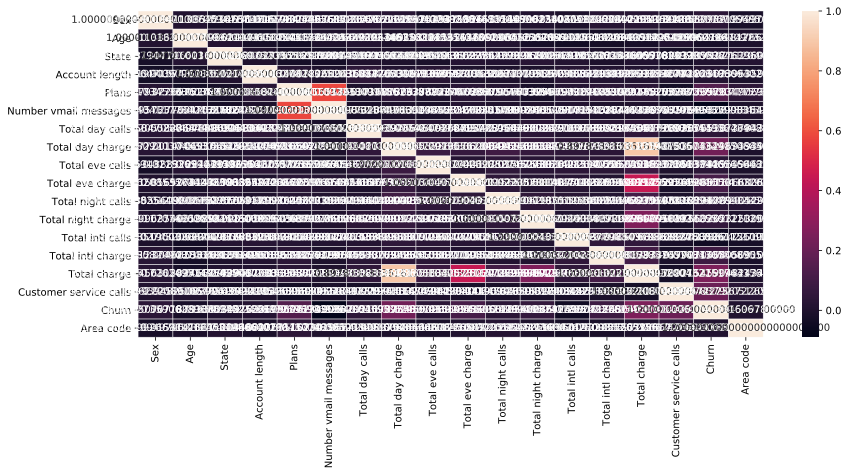

In [180]:
plt.figure(figsize=(14, 6))
sns.heatmap(data.corr(), annot=True, fmt=".25f", linewidths=.45)

Меньше всего на нужный нам признак Churn оказывают влияние такие признаки, как Sex, Age, Account length, State, Total day calls, Total eve calls, Total night calls, Total intl calls, Area code, Number vmail messages => их можно удалить.

In [181]:
data = data.drop([ 'Sex', 'Age', 'State', 'Account length', 'Area code', 'Number vmail messages',
                  'Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls'], axis=1) 

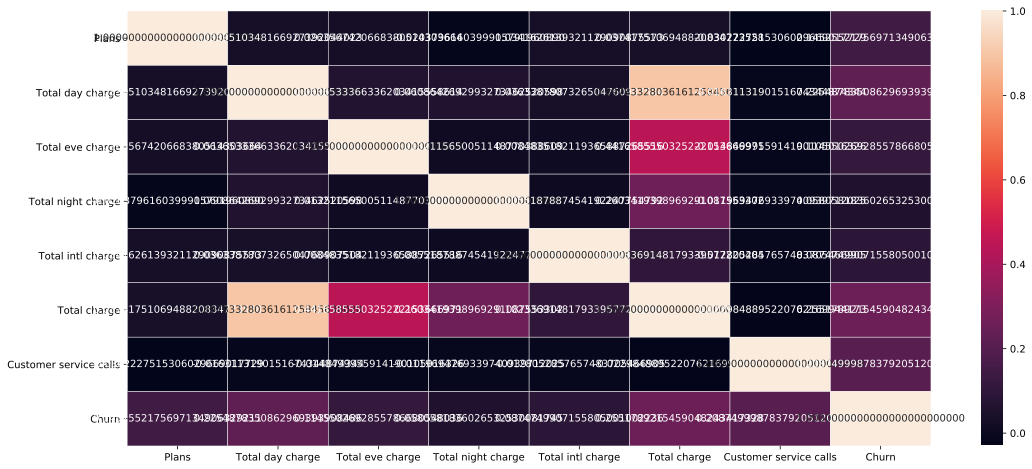

In [182]:
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True, fmt=".25f", linewidths=.45)

Всех сильнее Churn поддается влиянию от Total day charge, Total charge, Customer service calls

### Задание 10  
  
Рассмотрим основанную на правилах модель для предсказания оттока клиентов: 
* Если у пользователя подключен роуминг (International plan) & клиент звонил в тех. поддержку более 3-х раз => клиент уйдет (Churn = True)
* Иначе => клиент останется (Churn = False)  
  
  
Оцените качество данной модели на 5-fold валидации из 5 повторений. Для оценки качества рассмотрите различные метрики: F1-score, precision, recall, accuracy, balanced accuracy. Дайте комментарий к оценке.

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

In [184]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(data.drop(['Churn'], axis=1),
                                data['Churn'],
                                test_size=0.3, 
                                random_state=236584)

In [185]:
class PorkClassifier:       
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        return self
        
    def predict(self, data):
        predictions = []
        for index, row in data.iterrows():
            if row['Plans'] == 2 and row['Customer service calls'] > 3:
                predictions.append(True)
            else:
                predictions.append(False)
        
        return predictions
    
    def get_params(self, deep=True):
        return {"demo_param": self.demo_param}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [186]:
porkModel = PorkClassifier()
preds = porkModel.predict(testData)

In [187]:
round(metrics.accuracy_score(test_label, preds), 5)

0.857

In [188]:
Data = data.drop(['Churn'], axis=1)
label = data['Churn']

In [189]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

In [190]:
f1_sc = cross_val_score(porkModel, Data, label, cv=rskf, scoring='f1')
print('F1 score:' + str(f1_sc.mean()))

F1 score:0.05156581876079989


In [191]:
prec_sc = cross_val_score(porkModel, Data, label, cv=rskf, scoring='precision')
print('Precision:' + str(prec_sc.mean()))

Precision:0.743904761904762


In [192]:
rec_sc = cross_val_score(porkModel, Data, label, cv=rskf, scoring='recall')
print('Recall:' + str(rec_sc.mean()))

Recall:0.026911512027491407


In [193]:
acc_sc = cross_val_score(porkModel, Data, label, cv=rskf, scoring='accuracy')
print('Accuracy:' + str(acc_sc.mean()))

Accuracy:0.8574858516687601


In [194]:
balacc_sc = cross_val_score(porkModel, Data, label, cv=rskf, scoring='balanced_accuracy')
print('Balanced accuracy:' + str(balacc_sc.mean()))

Balanced accuracy:0.5125850063302586


Из значения метрик видно, что полнота очень маленькая, и данная модель является сильно неточной. Значит для нашей задачи она не подходит.

## Часть 2. Методы машинного обучения <a id="part2"></a>

Продолжаем работать с данными по оттоку клиентов.  
Сформулируем задачу машинного обучения: необходимо построить модель, определяющую, останется клиент или уйдет. 
  
Для решения заданий, представленных ниже, необходимо использовать данные, полученные после выполнения всех преобразований в первой части. 

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [195]:
data.head(5)

,Plans,Total day charge,Total eve charge,Total night charge,Total intl charge,Total charge,Customer service calls,Churn
0,1,45.07,16.78,11.01,2.70,75.56,1,False
1,1,27.47,16.62,11.45,3.70,59.24,1,False
2,0,41.38,10.30,7.32,3.29,62.29,0,False
3,2,50.90,5.26,8.86,1.78,66.80,2,False
4,2,28.34,12.61,8.41,2.73,52.09,3,False


Разделим данные на обучающую и тестовую выборки:

In [196]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(data.drop(['Churn'], axis=1),
                                data['Churn'],
                                test_size=0.3, 
                                random_state=236584)

In [197]:
print('Size of train set:', trainData.shape)
print('Size of test set:', testData.shape)

Size of train set: (2333, 7)
Size of test set: (1000, 7)


In [198]:
print('Class distribution on train:',
      train_label.value_counts(normalize=True),
      '\nClass distribution on test:', 
      test_label.value_counts(normalize=True),
      sep='\n')

Class distribution on train:
False    0.855551
True     0.144449
Name: Churn, dtype: float64

Class distribution on test:
False    0.854
True     0.146
Name: Churn, dtype: float64


Построим базовую модель:

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
dtree_model = DecisionTreeClassifier(max_depth=5)
dtree_model.fit(trainData, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Оценим качество на 5-fold:

In [201]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
import graphviz
from sklearn.tree import export_graphviz

In [202]:
def get_dot_data(model, train_data):
    dot_data = export_graphviz(model, 
                           out_file=None, 
                           feature_names=train_data.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)
    return dot_data

In [203]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

scores_dtree = []
scores_f1 = []

dot_data = []

Data = data.drop(['Churn'], axis=1)
label = data['Churn']

for i in range(10):
    scores_dtree.extend(cross_val_score(dtree_model, Data, label, cv=skf, scoring='f1_micro'))
    
    dot_data.append(get_dot_data(dtree_model, Data))
    
    for train_index, test_index in skf.split(Data, label): 
        x_train,x_test = Data.iloc[train_index],Data.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        
        preds = dtree_model.predict(x_test)
        
        x = metrics.f1_score(y_true=y_test, y_pred=preds)
        scores_f1.append(x)
        
scores_dtree = np.array(scores_dtree)
scores_f1 = np.array(scores_f1)

del Data, label

In [204]:
print('Mean score for DTree:', round(np.mean(scores_dtree), 5),
      '\nMean score F1:', round(np.mean(scores_f1), 5))

Mean score for DTree: 0.96334 
Mean score F1: 0.86489


Построю третье дерево

In [205]:
graph = graphviz.Source(dot_data[2]) 
graph.render("dtree_2") 

'dtree_2.pdf'

Правила принятия решения

Принадлежность к class 0:
1. Если Total charge <= 74.04 && Customer service calls <= 3.5 && Plans <= 1.5 && Total night charge <= 7.405 && Total day charge <= 19.425

2. Если Total charge <= 74.04 && Customer service calls <= 3.5 && Plans <= 1.5 && Total night charge <= 7.405 && Total day charge > 19.425

3. Если Total charge <= 74.04 && Customer service calls <= 3.5 && Plans > 1.5 && Total intl charge <= 3.535 && Total day charge <=(>) 22.77

4. Если Total charge <= 74.04 && Customer service calls > 3.5 && Total charge > 56.71 && Customer service calls <= 8.5 && Total eve charge <=(>=) 25.0

5. Если Total charge > 74.04 && Plans > 0.5 && Plans <= 1.5 && Total day charge <= 67.935

6. Если Total charge > 74.04 && Plans > 2.5 && Total night charge > 12.07

Принадлежность к class 1:

1. Если Total charge <= 74.04 && Customer service calls <= 3.5 && Plans > 1.5 && Total intl charge > 3.535

2. Если Total charge <= 74.04 && Customer service calls > 3.5 && Total charge <= 56.71

3. Если Total charge <= 74.04 && Customer service calls > 3.5 && Total charge > 56.71 && Customer service calls > 8.5

4. Если Total charge > 74.04 && Plans <= 0.5

5. Если Total charge > 74.04 && Plans > 0.5 && Plans <= 1.5 && Total day charge > 67.935

6. Если Total charge > 74.04 && Plans > 1.5 && Plans <= 2.5

7. Если Total charge > 74.04 && Plans > 2.5 && Total night charge <= 12.07

Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой.

Построю графики для остальных деревьев и сравню их

In [206]:
i = 10
for d_data in dot_data:
    graph = graphviz.Source(d_data) 
    graph.render('dtree_' + str(i))
    i+=1

CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'dtree_11']' returned non-zero exit status 1.

## Задание 2  
  
На кросс-валидации (5-fold из 5 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble.forest import RandomForestClassifier

In [ ]:
trees_numbers = [1,2,5,10,50,100]

In [ ]:
scores = {
    1: [],
    2:[],
    5:[],
    10:[],
    50:[],
    100:[]
}

Data = data.drop(['Churn'], axis=1)
label = data['Churn']

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

for i in scores:
    if i == 1:
        bootstrap = False
    else:
        bootstrap = True
        
    randf_model = RandomForestClassifier(n_estimators=i, bootstrap=bootstrap)
    scores[i] = pd.Series(cross_val_score(randf_model, Data, label, cv=rskf, scoring='f1_micro'))

del Data, label

In [ ]:
for i in trees_numbers:  
    scores[i].plot()
    
plt.ylabel('f1_micro')
plt.xlabel('meausures_number')

L = plt.legend()
i = 0
for num in trees_numbers:
    L.get_texts()[i].set_text(str(num))
    i = i + 1
    
plt.title('By trees_number')
plt.show()

Из графика видно, что начиная с кол-ва деревьев равному 50, метрика изменяется незначительно. Отсюда следует вывод, что будет достаточно 50-100 деревьев.

Добавлю на график scores решающего дерева из предыдущего задания для сравнения.

In [ ]:
for i in trees_numbers:  
    scores[i].plot()
    
pd.Series(scores_dtree).plot()

plt.ylabel('f1_micro')
plt.xlabel('meausures_number')

L = plt.legend()
i = 0
for num in trees_numbers:
    L.get_texts()[i].set_text(str(num))
    i = i + 1
    
L.get_texts()[len(trees_numbers)].set_text('dtree_score')
    
plt.title('By trees_number')
plt.show()

Видно, что результаты решающего дерева и случайного леса с кол-вом деревьев 50-100, практически не отличаются

In [ ]:
scores = pd.DataFrame(scores)
scores.columns = [str(i) + ' estimators' for i in scores.columns]
scores.describe()

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30. Обучите Random Forest  с настроенными параметрами на обучающей выборке. На тестовой выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params= {
    "n_estimators": [10,20,30], 
    "bootstrap": [True, False],
    "max_depth": [3, 5, None], 
    "max_features": [1, 5, 7], 
    "min_samples_split": [2, 4, 8], 
    "min_samples_leaf": [1, 3, 10], 
}

In [ ]:
rdf_model = RandomForestClassifier()
rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)
clf = GridSearchCV(rdf_model, params, cv=rskf, scoring="f1", n_jobs=8)

In [ ]:
Data = data.drop(['Churn'], axis=1)
label = data['Churn']

In [ ]:
%%time
clf.fit(Data, label)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

Оценю качество всего леса на тестовых данных.

In [ ]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(data.drop(['Churn'], axis=1),
                                data['Churn'],
                                test_size=0.3, 
                                random_state=236584)

In [ ]:
rdf_model = RandomForestClassifier(
bootstrap=True,
n_estimators=20,
max_depth=None,
min_samples_leaf=10,
min_samples_split=2,
max_features=6)

skf = RepeatedStratifiedKFold(n_splits = 5, n_repeats=5)

rdf_model.fit(trainData, train_label)

На тестовой выборке оценю качество f1 score всего ансамбля и каждого дерева отдельно. Построю график распределения качества деревьев в ансамбле

In [ ]:
scores = pd.Series(
    [
        metrics.f1_score(test_label, x.predict(testData)) for x in rdf_model.estimators_ 
    ]
)

In [ ]:
scores

In [ ]:
scores.describe()

In [ ]:
sns.boxplot(scores)
plt.xlabel('f1-score')
plt.show()

In [ ]:
rdf_score = metrics.f1_score(test_label, rdf_model.predict(testData))
rdf_score

Средний score по всем деревьям примерно равен score-у всего леса.

Оценю важность признаков в Random forest

In [ ]:
scores = cross_val_score(rdf_model, testData, test_label, cv=rskf, scoring='f1_micro')
scores

In [ ]:
rdf_model.feature_importances_

In [ ]:
d = data.drop(['Churn'], axis = 1)
pd.Series(rdf_model.feature_importances_, index=d.columns).sort_values(ascending=False)

Видно, что общее кол-во оплат за услуги, а также выбранный тариф имеют наибольший вклад. Люди могут быть недовольны либо высокими ценами, либо конкретно ценами или услугами в рамках какого-то тарифа. На 3-м месте стоит признак - кол-во обращений в службу поддержки. То есть, если потребителю что-то не нравится, он звонит в компанию и с более высокой выроятностью он может потом отказаться от услуг.

### Задание 4  
  
* Используйте логистическую регрессию для решения задачи, оцените качество (roc auc) на 5-fold валидации из 5 повторений. 
* Аналогично (на такой же валидации с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30. На обучающей выборке обучите логистическую регрессию и Random Forest  с настроенными параметрами. Для обеих моделей оцените качество на тестовой выборке - постройте ROC-кривую, вычислите roc auc.

Логистическая регрессия.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from pylab import *

In [ ]:
Data = data.drop(['Churn'], axis = 1)
Label = data['Churn']

Нормализация и стандартизация данных

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_Data = preprocessing.normalize(Data)
standardized_Data = preprocessing.scale(Data)

In [ ]:
log_model = LogisticRegression(C=2)
log_model.fit(Data, Label)

In [ ]:
predictedLabels = log_model.predict(testData)

In [ ]:
predictedLabels.shape

In [ ]:
plt.plot(test_label[1:300].values, 'b-', label='true')
plt.plot(predictedLabels[1:300], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("Churn")

plt.legend(loc='best')

plt.show()

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
roc_auc_log = cross_val_score(log_model, Data, Label, cv=rskf, scoring='roc_auc')

In [ ]:
roc_auc_log.mean()

Random Forest

In [ ]:
rdf_model = RandomForestClassifier(
    n_estimators=5,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=4,
    max_features=6)

rdf_model.fit(Data, Label)

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
roc_auc_rdf = cross_val_score(rdf_model, Data, Label, cv=rskf, scoring='roc_auc')

In [ ]:
roc_auc_rdf.mean()

Если судить по roc_auc, то качество у случайного леса практически не отличается от логистической регрессии.

Обучу модели на тренировочных данных.

In [ ]:
log_model = LogisticRegression(C=2)
log_model.fit(trainData, train_label)

In [ ]:
preds = log_model.predict(testData)
roc_auc_log_test = metrics.roc_auc_score(test_label, preds)

In [ ]:
roc_auc_log_test

In [ ]:
rdf_model = RandomForestClassifier(
    n_estimators=5,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=4,
    max_features=6)

rdf_model.fit(trainData, train_label)

In [ ]:
preds = rdf_model.predict(testData)
roc_auc_rdf_test = metrics.roc_auc_score(test_label, preds)

In [ ]:
roc_auc_rdf_test

Построю roc кривую для логистической модели.

In [ ]:
preds = log_model.predict_proba(testData)[:,1]
frp,trp, threshold = roc_curve(test_label, preds)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

Построю roc кривую для случайного леса.

In [ ]:
preds = rdf_model.predict_proba(testData)[:,1]
frp,trp, threshold = roc_curve(test_label, preds)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### Задание 5  
  
Настройте гиперпараметры модели SVM на 5-fold валидации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.    
Каково качество модели? Каков разброс значений метрики? Насколько сильно различие между лучшей и худшей конфигурациями параметров?

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
Data = data.drop(['Churn'], axis = 1)

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(Data)

In [ ]:
Data.iloc[:,:] = std_scaler.transform(Data)

In [ ]:
Data.shape

In [ ]:
Data.head()

In [ ]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
svm_model = SVC(kernel='rbf')

clf = GridSearchCV(svm_model, params, cv=rskf, scoring='f1_micro', n_jobs=8)

In [ ]:
Label = data['Churn']

In [ ]:
%%time
clf.fit(Data, Label)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
clf.cv_results_

In [ ]:
pd.DataFrame.from_dict(clf.cv_results_).mean_test_score.plot.box()

In [ ]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

In [ ]:
GridSearch_table_plot(clf, 'C')

In [ ]:
GridSearch_table_plot(clf, 'gamma')

# Задание 6

Для алгоритма AdaBoost с параметрами по умолчанию оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.

In [ ]:
ab_model = AdaBoostClassifier()
ab_model.fit(trainData, train_label)

In [ ]:
staged_scores = []

for x in ab_model.staged_predict(testData):
    staged_scores.append(metrics.f1_score(test_label, x))
    
staged_scores = pd.Series(staged_scores)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)
scores = []
scores_train = []

Data = data.drop(['Churn'], axis = 1)
label = data['Churn']

for train_index, test_index in kf.split(Data):
    x_train, x_test = Data.iloc[train_index], Data.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
    
    ab_model = AdaBoostClassifier()
    ab_model.fit(x_train, y_train)
    
    staged_scores = []
    for x in ab_model.staged_predict(x_test):
        staged_scores.append(metrics.f1_score(y_test,x))
        
    staged_scores_train = []
    for x in ab_model.staged_predict(x_train):
        staged_scores_train.append(metrics.f1_score(y_train,x))  
        
    staged_scores = pd.Series(staged_scores)
    staged_scores_train = pd.Series(staged_scores_train)
    
    scores.append(staged_scores)
    scores_train.append(staged_scores_train)
    
del Data, label

In [ ]:
for i in range(len(scores)):
    scores[i].plot()

plt.xlabel('step')
plt.ylabel('f1_micro_value')

plt.title('Staged')
plt.show()

### Задание 7  
  
* Настройте гиперпараметры AdaBoost на 5-fold валидации из 5 повторений, используя в качестве базовых классификаторов дерево решений и SVM. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.    
* Выведите наилучшую конфигурацию параметров для каждого базового классификатора. Сравните качество. 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
Data = data.drop(['Churn'], axis=1)
Label = data['Churn']

In [ ]:
params = {
    'base_estimator__criterion' : ['gini', 'entropy'],
    'base_estimator__splitter' :   ['best', 'random'],
    'base_estimator__max_depth': range(1, 6),
    'n_estimators': range(10,101,10),
    'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
dtree_model = DecisionTreeClassifier()
ab_model = AdaBoostClassifier(base_estimator=dtree_model)
clf = GridSearchCV(ab_model, params, cv=rskf, scoring='f1_micro', n_jobs=8)

In [ ]:
frac_data = Data.sample(frac =.01) 
frac_label = Label.sample(frac =.01)

In [ ]:
frac_data.shape

In [ ]:
%%time
clf.fit(frac_data, frac_label)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
svm_model = SVC(probability=True, kernel='linear', C=10.0, gamma=0.1)
ab_model = AdaBoostClassifier()

In [ ]:
params = {
    'base_estimator': [svm_model],
    'n_estimators': range(10,101,10),
    'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'algorithm': ['SAMME']
}

In [ ]:
clf = GridSearchCV(ab_model, param_grid=params, cv=rskf, scoring='f1_micro', n_jobs=8)

In [ ]:
frac_data = Data.sample(frac =.30) 
frac_label = Label.sample(frac =.30)

In [ ]:
%%time
clf.fit(frac_data, frac_label)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

## Часть 3. Соревнование по машинному обучению <a id="part3"></a>

В данном задании вам предлагается принять участие в соревновании на kaggle: [PUBG Finish Placement Prediction](https://www.kaggle.com/c/pubg-finish-placement-prediction).  
Задача соревнования заключается в том, чтобы предсказать итоговый результат игрока (место в турнирном зачете) в [популярной](https://meduza.io/feature/2017/12/22/u-etoy-igry-net-syuzheta-i-prokachki-ya-potratil-na-nee-100-chasov-zhizni-i-eto-tolko-nachalo) игре PlayerUnknownʼs Battlegrounds на основании результатов предыдущих игр.  
 
Подробное описание задачи, данные и их описание, целевую метрику и правила вы можете найти на странице соревнования. 

Для участия в соревновании, т.е. для того, чтобы скачать данные, сабмитить результаты и попасть в leaderboard, вам необходимо создать аккаунт на [kaggle](https://www.kaggle.com/).

Данное соревнование является `Kernels Only` - это означает, что вы должны сабмитить не файл с предсказаниями для тестовой выборки, а код, который будет выполняться (преобразовывать данные, обучать модель) и создавать файл с предсказаниями. Как это сделать сказано в [описании](https://www.kaggle.com/c/pubg-finish-placement-prediction#Kernels-FAQ), также есть хороший [тьюториал](https://www.kaggle.com/dansbecker/submitting-from-a-kernel).

После того, как вы выполните сабмит, в leaderboard вы сможете посмотреть качество вашей модели на тестовой выборке и место в общем зачете.  
Вы можете делать много (до 10 в день) сабмитов - в leaderbord всегда отображается самый лучший (остальные можно посмотреть в `My Submissions`).

### Задание  
  
Необходимо построить и засабмитить модель, которая:   
* Задача минимум – покажет на тестовой выборке качество выше baseline: 0.2
* Задача максимум - решит задачу как можно точнее  
  
При решении можно и нужно выполнять различные преобразования признаков и применять различные модели машинного обучения.  

В качестве результата необходимо: 
* Сказать ваш логин на kaggle, чтобы мы могли найти вас в leaderboard
* Предоставить скрипт, выполняющий преобразования данных (из формата начальных данных в тот формат, который должна принимать на вход модель) и предсказания, а также сохраненную обученную модель. 
* Предоставить скрипт, который вы сабмитили.
* Сделать краткое описание преобразования данных и итоговой модели. В описание можно также включить некоторые результаты анализа данных (если считаете их полезными и интересными) и собственную оценку модели на кросс-валидации.  
  
По результатам будет составлен наш локальный leaderboard. 